<a href="https://colab.research.google.com/github/HectorDelgadoJ/PCA-Y-SOM/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOM

El siguiente código utiliza el Diabetes Dataset del módulo sklearn.datasets, y se entrena un SOM utilizando la biblioteca MiniSom. Aquí está el código explicado paso a paso:

Librerias

In [ ]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargar y Preprocesar los Datos

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler


Se carga el Diabetes Dataset, que incluye 10 características (como la edad, el IMC y la presión sanguínea) y un valor objetivo (y), que es la progresión de la enfermedad.
Luego se normalizan los datos utilizando StandardScaler, ya que el SOM necesita que los datos estén en la misma escala para funcionar correctamente.

In [ ]:
data = load_diabetes()  # Cargar los datos
X = data.data  # Características
y = data.target  # Valores objetivo (progresión de la diabetes)
X_scaled = StandardScaler().fit_transform(X)  # Normalizar las características


## Configuración y Entrenamiento del SOM

In [ ]:
from minisom import MiniSom

som_size = 7  # Tamaño de la cuadrícula (7x7 nodos)
som = MiniSom(som_size, som_size, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)


Se entrena el SOM con 1000 iteraciones, durante las cuales se ajustan los pesos de los nodos para representar los datos.

In [ ]:
som.train(X_scaled, num_iteration=1000)  # Entrenamiento del SOM


## Visualización del SOM

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(X_scaled.shape[0]):  # Iteramos sobre todas las muestras de datos
    x_winner, y_winner = som.winner(X_scaled[i])  # Nodo ganador para cada muestra
    plt.scatter(x_winner + 0.5, y_winner + 0.5, color=plt.cm.jet(y[i] / np.max(y)), s=50, edgecolor='k')


Se configura la visualización para mostrar el mapa SOM con los puntos proyectados y una cuadrícula para facilitar la interpretación.

In [ ]:
plt.title('Mapa Autoorganizado (SOM) del Diabetes Dataset')
plt.xlim(0, som_size)  # Límites del eje X
plt.ylim(0, som_size)  # Límites del eje Y
plt.grid(True)
plt.show()  # Mostrar el gráfico


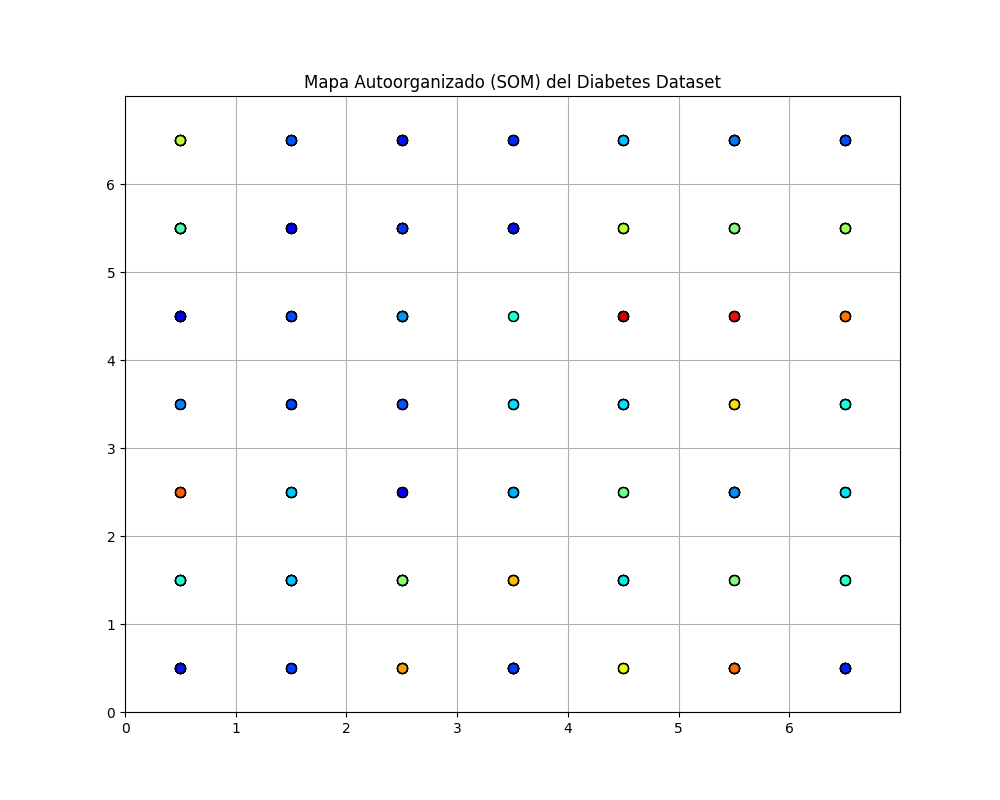